In [1]:
!pip install librosa

    100% |████████████████████████████████| 1.6MB 494kB/s ta 0:00:011
    100% |████████████████████████████████| 276kB 5.9MB/s eta 0:00:01
    100% |████████████████████████████████| 327kB 4.9MB/s eta 0:00:01
    100% |████████████████████████████████| 3.2MB 495kB/s ta 0:00:011
    100% |████████████████████████████████| 16.8MB 96kB/s  eta 0:00:01    75% |████████████████████████▎       | 12.8MB 12.3MB/s eta 0:00:01
  Running setup.py bdist_wheel for librosa ... done
  Stored in directory: /root/.cache/pip/wheels/18/b8/10/f0f8f6ac60668a5cd75596cf14c25bb6b3ea1ecd815f058b7e
  Running setup.py bdist_wheel for audioread ... done
  Stored in directory: /root/.cache/pip/wheels/53/02/90/7b5c4081b7470c550ab605f600bad237dde12a6b8999b11f50
  Running setup.py bdist_wheel for resampy ... done
  Stored in directory: /root/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
Successfully built librosa audioread resampy
You are using pip version 9.0.1, however version 18.1 i

In [2]:
import pickle
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

# Step 0

Loading and evaluation of the dataset

In [3]:
raw_wave_pickle = open("raw_wave_training_frames.pickle","rb")
raw_wave_training_frames = pickle.load(raw_wave_pickle)

raw_wave_pickle = open("raw_wave_validation_frames.pickle","rb")
raw_wave_validatino_frames = pickle.load(raw_wave_pickle)

print(len(raw_wave_training_frames))
print(len(raw_wave_validatino_frames))

948
130


In [4]:
sam = raw_wave_training_frames[0]
sam.shape

(638, 400)

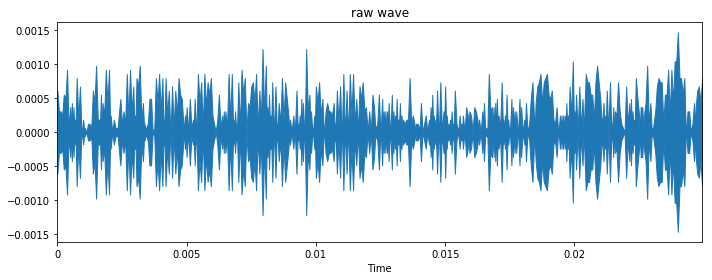

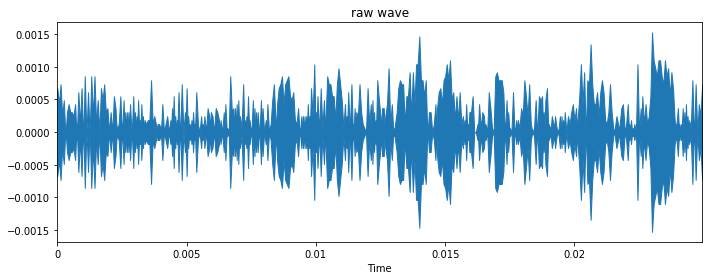

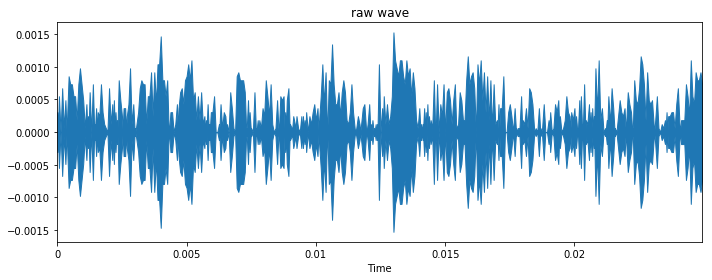

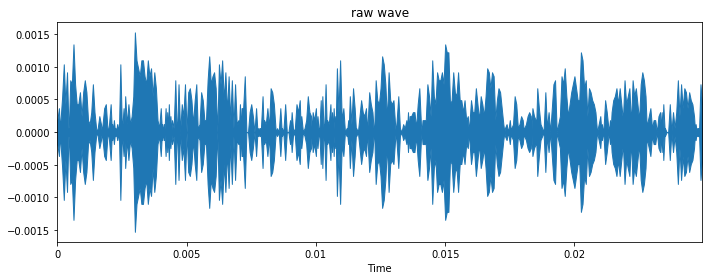

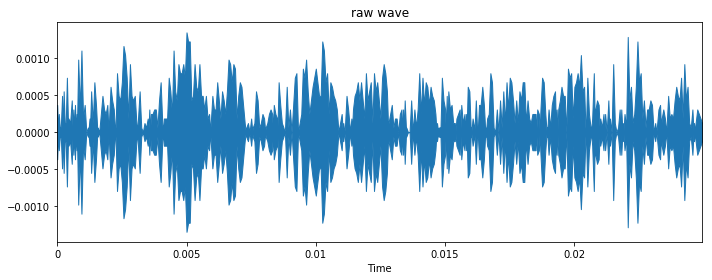

In [5]:
# display data
for i in range(5):
    plt.figure(figsize=(10, 4))
    librosa.display.waveplot(np.array(sam[i]), sr=16000, x_axis='time')
    plt.title('raw wave')
    plt.tight_layout()

In [6]:
# load labels
def load_labels(file_path):
    labels = []
    
    for filename in os.listdir(file_path):
        if filename.endswith(".txt"):
            file = open(file_path+filename, "r") 
            labels.append(file.read())
            
    return labels

In [7]:
training_dataset_path = "./an4_dataset/train/"
labels = load_labels(training_dataset_path)

validation_dataset_path = "./an4_dataset/validation/"
labels_valid = load_labels(validation_dataset_path)

# Step 1

Here we create a neural network, define a loss function (CTCLoss in our case) and an optimizer.

In [24]:
import torch
import torch.nn as nn

import torch.optim as optim

#from torch.nn.parameter import Parameter

#import torch.nn.functional as F

#import torch.nn.init as init
from torch.nn import Conv1d, Linear
from warpctc_pytorch import CTCLoss
from torch.autograd import Variable
from torch.nn.functional import relu
#, Conv2d, BatchNorm2d, MaxPool1d, Dropout2d, 
#, elu, relu6, sigmoid, tanh, softmax

import itertools


In [26]:
# hyperameters of the model
num_classes = 28
channels = 400
height = 638
# after first layer we restrict number of channels to 100 - we hope that network creates filterbanks. 
num_filters_conv1 = 100
kernel_size_conv1 = 2 # [height, width]
stride_conv1 = 1 # [stride_height, stride_width]
padding_conv1 = 0
dilation_conv1 = 2

# we are not using pooling layer because it had worse perfrmance , yet it is to further evalutaion
# we keep them same as the other model using mel-features

#2nd convolutional layer
num_filters_conv2 = 100
kernel_size_conv2 = 11 # [height, width]
stride_conv2 = 1 # [stride_height, stride_width]
padding_conv2 = 0
dilation_conv2 = 1

stride_pool2 = 2
kernel_size_pool2 = 2
padding_pool2 = 0
dilation_pool2 = 1

#3rd convolutional layer
num_filters_conv3 = 100
kernel_size_conv3 = 9 # [height, width]
stride_conv3 = 1 # [stride_height, stride_width]
padding_conv3 = 0
dilation_conv3 = 1


stride_pool3 = 2
kernel_size_pool3 = 2
padding_pool3 = 0
dilation_pool3 = 1

#4th convolutional layer
num_filters_conv4 = 100
kernel_size_conv4 = 9 # [height, width]
stride_conv4 = 1 # [stride_height, stride_width]
padding_conv4 = 0
dilation_conv4 = 1

#5th convolutional layer
num_filters_conv5 = 100
kernel_size_conv5 = 5 # [height, width]
stride_conv5 = 1 # [stride_height, stride_width]
padding_conv5 = 0
dilation_conv5 = 1

#6th convolutional layer
num_filters_conv6 = 100
kernel_size_conv6 = 5 # [height, width]
stride_conv6 = 1 # [stride_height, stride_width]
padding_conv6 = 0
dilation_conv6 = 1

#7th convolutional layer
num_filters_conv7 = 100
kernel_size_conv7 = 5 # [height, width]
stride_conv7 = 1 # [stride_height, stride_width]
padding_conv7 = 0
dilation_conv7 = 1

#8th convolutional layer
num_filters_conv8 = 100
kernel_size_conv8 = 3 # [height, width]
stride_conv8 = 1 # [stride_height, stride_width]
padding_conv8 = 0
dilation_conv8 = 1

#9th convolutional layer
num_filters_conv9 = 100
kernel_size_conv9 = 3 # [height, width]
stride_conv9 = 1 # [stride_height, stride_width]
padding_conv9 = 0
dilation_conv9 = 1


#10th convolutional layer
num_filters_conv10 = 100
kernel_size_conv10 = 3 # [height, width]
stride_conv10 = 1 # [stride_height, stride_width]
padding_conv10 = 0
dilation_conv10 = 1

#11th convolutional
num_filters_conv11 = 400
kernel_size_conv11 = 1
stride_conv11 = 1
padding_conv11 = 0
dilation_conv11 = 1

num_filters_conv12 = 28
kernel_size_conv12 = 1
stride_conv12 = 1
padding_conv12 = 0
dilation_conv12 = 1

batch_size=10
num_l1 = 512
dilation=1

def compute_conv_dim(dim_size):
    return int((dim_size - kernel_size_conv1 + 2 * padding_conv1) / stride_conv1 + 1)

def compute_maxPool_dim(dim_size):
    return int((dim_size - kernel_size_pool1 + 2 * padding_conv1) / stride_pool1 + 1)


def compute_conv_dim_1d(L_in, kernel_in, padding_in = 0, dilation_in = 1, stride_in = 1):
    return int((L_in + 2*padding_in - dilation_in*(kernel_in - 1) - 1)/stride_in + 1)

def compute_conv_height_2d(H_in, kernel_size_height, padding_height=0, dilation_height=1, stride_height=1):
    return int((H_in+2*padding_height-dilation_height*(kernel_size_height - 1) - 1)/stride_height + 1)

def compute_conv_width_2d(W_in,  kernel_size_width, padding_width=0, dilation_width=1, stride_width=1):
    return int((W_in+2*padding_width-dilation_width*(kernel_size_width-1) - 1)/stride_width + 1)

def compute_pool_dim_1d(L_in, kernel_in, padding_in = 0, dilation_in = 1, stride_in = 1):
    return int((L_in + 2*padding_in - dilation_in*(kernel_in - 1) - 1)/stride_in + 1)
    
# define network
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv_1 = Conv1d(in_channels=channels,
                             out_channels=num_filters_conv1,
                             kernel_size=kernel_size_conv1,
                             stride=stride_conv1,
                             padding=padding_conv1,
                             dilation=dilation_conv1)
        
        
        
        self.conv_dim_1=compute_conv_dim_1d(L_in=height, kernel_in=kernel_size_conv1,padding_in=padding_conv1,
                        dilation_in=dilation_conv1, stride_in=stride_conv1)
            
        self.conv_dropout_1=torch.nn.Dropout(p=0.3)
        self.conv_batchnorm_1=torch.nn.BatchNorm1d(num_filters_conv1)
        
        
        self.conv_2 = Conv1d(in_channels=num_filters_conv1,
                             out_channels=num_filters_conv2,
                             kernel_size=kernel_size_conv2,
                             stride=stride_conv2,
                             padding=padding_conv2,
                             dilation=dilation_conv2)
        
        
        
        
       
        self.conv_dim_2=compute_conv_dim_1d(L_in=self.conv_dim_1, kernel_in=kernel_size_conv2,padding_in=padding_conv2,
                        dilation_in=dilation_conv2, stride_in=stride_conv2)
        
        
        self.conv_dropout_2=torch.nn.Dropout(p=0.3)
        self.conv_batchnorm_2=torch.nn.BatchNorm1d(num_filters_conv2)
        
        self.conv_3 = Conv1d(in_channels=num_filters_conv2,
                             out_channels=num_filters_conv3,
                             kernel_size=kernel_size_conv3,
                             stride=stride_conv3,
                             padding=padding_conv3,
                             dilation=dilation_conv3)
        
        
        self.conv_dim_3=compute_conv_dim_1d(L_in=self.conv_dim_2, kernel_in=kernel_size_conv3,padding_in=padding_conv3,
                        dilation_in=dilation_conv3, stride_in=stride_conv3)
        
        
      
        
        self.conv_dropout_3=torch.nn.Dropout(p=0.3)
        self.conv_batchnorm_3=torch.nn.BatchNorm1d(num_filters_conv3)
        
        self.conv_4 = Conv1d(in_channels=num_filters_conv3,
                             out_channels=num_filters_conv4,
                             kernel_size=kernel_size_conv4,
                             stride=stride_conv4,
                             padding=padding_conv4,
                             dilation=dilation_conv4)
        
        
        
        
        self.conv_dim_4=compute_conv_dim_1d(L_in=self.conv_dim_3, kernel_in=kernel_size_conv4,padding_in=padding_conv4,
                        dilation_in=dilation_conv4, stride_in=stride_conv4)
        
        self.conv_dropout_4=torch.nn.Dropout(p=0.3)
        self.conv_batchnorm_4=torch.nn.BatchNorm1d(num_filters_conv4)
        
        self.conv_5 = Conv1d(in_channels=num_filters_conv4,
                             out_channels=num_filters_conv5,
                             kernel_size=kernel_size_conv5,
                             stride=stride_conv5,
                             padding=padding_conv5,
                             dilation=dilation_conv5)
        
        self.conv_dim_5=compute_conv_dim_1d(L_in=self.conv_dim_4, kernel_in=kernel_size_conv5,padding_in=padding_conv5,
                        dilation_in=dilation_conv5, stride_in=stride_conv5)
          
        
        
        self.conv_dropout_5=torch.nn.Dropout(p=0.3)
        self.conv_batchnorm_5=torch.nn.BatchNorm1d(num_filters_conv5)
        
        self.conv_6 = Conv1d(in_channels=num_filters_conv5,
                             out_channels=num_filters_conv6,
                             kernel_size=kernel_size_conv6,
                             stride=stride_conv6,
                             padding=padding_conv6,
                             dilation=dilation_conv6)
        
        self.conv_dim_6=compute_conv_dim_1d(L_in=self.conv_dim_5, kernel_in=kernel_size_conv6,padding_in=padding_conv6,
                        dilation_in=dilation_conv6, stride_in=stride_conv6)
        
        
        self.conv_dropout_6=torch.nn.Dropout(p=0.3)
        self.conv_batchnorm_6=torch.nn.BatchNorm1d(num_filters_conv6)
        
        self.conv_7 = Conv1d(in_channels=num_filters_conv6,
                             out_channels=num_filters_conv7,
                             kernel_size=kernel_size_conv7,
                             stride=stride_conv7,
                             padding=padding_conv7,
                             dilation=dilation_conv7)
        
        self.conv_dim_7 = compute_conv_dim_1d(L_in=self.conv_dim_6, kernel_in=kernel_size_conv7,padding_in=padding_conv7,
                        dilation_in=dilation_conv7, stride_in=stride_conv7)
          
        
        self.conv_dropout_7=torch.nn.Dropout(p=0.3)
        self.conv_batchnorm_7=torch.nn.BatchNorm1d(num_filters_conv7)
        
        self.conv_8 = Conv1d(in_channels=num_filters_conv7,
                             out_channels=num_filters_conv8,
                             kernel_size=kernel_size_conv8,
                             stride=stride_conv8,
                             padding=padding_conv8,
                             dilation=dilation_conv8)
        
        self.conv_dim_8 = compute_conv_dim_1d(L_in=self.conv_dim_7, kernel_in=kernel_size_conv8,padding_in=padding_conv8,
                        dilation_in=dilation_conv8, stride_in=stride_conv8)
          
        
        
        self.conv_dropout_8=torch.nn.Dropout(p=0.3)
        self.conv_batchnorm_8=torch.nn.BatchNorm1d(num_filters_conv8)
        
        
        self.conv_9 = Conv1d(in_channels=num_filters_conv8,
                             out_channels=num_filters_conv9,
                             kernel_size=kernel_size_conv9,
                             stride=stride_conv9,
                             padding=padding_conv9,
                             dilation=dilation_conv9)
        
        self.conv_dim_9 = compute_conv_dim_1d(L_in=self.conv_dim_8, kernel_in=kernel_size_conv9,padding_in=padding_conv9,
                        dilation_in=dilation_conv9, stride_in=stride_conv9)
          
        
        
        self.conv_dropout_9=torch.nn.Dropout(p=0.3)
        self.conv_batchnorm_9=torch.nn.BatchNorm1d(num_filters_conv9)
        
        
        self.l1_in_features = num_filters_conv9
        #self.l1_in_features = channels * height * width
        
        self.conv_10 = Conv1d(in_channels=num_filters_conv9,
                             out_channels=num_filters_conv10,
                             kernel_size=kernel_size_conv10,
                             stride=stride_conv10,
                             padding=padding_conv10,
                             dilation=dilation_conv10)
        
        self.conv_dim_10 = compute_conv_dim_1d(L_in=self.conv_dim_9, kernel_in=kernel_size_conv10,padding_in=padding_conv10,
                        dilation_in=dilation_conv10, stride_in=stride_conv10)
          
        
        
        self.conv_dropout_10=torch.nn.Dropout(p=0.3)
        self.conv_batchnorm_10=torch.nn.BatchNorm1d(num_filters_conv10)
        
        self.conv_11 = Conv1d(in_channels=num_filters_conv10,
                             out_channels=num_filters_conv11,
                             kernel_size=kernel_size_conv11,
                             stride=stride_conv11,
                             padding=padding_conv11,
                             dilation=dilation_conv11)
        
        self.conv_dim_11 = compute_conv_dim_1d(L_in=self.conv_dim_10, kernel_in=kernel_size_conv11,padding_in=padding_conv11,
                        dilation_in=dilation_conv11, stride_in=stride_conv11)
          
        
        
        self.conv_dropout_11 = torch.nn.Dropout(p=0.3)
        self.conv_batchnorm_11 = torch.nn.BatchNorm1d(num_filters_conv11)
        
        
        self.conv_12 = Conv1d(in_channels=num_filters_conv11,
                             out_channels=num_filters_conv12,
                             kernel_size=kernel_size_conv12,
                             stride=stride_conv12,
                             padding=padding_conv12,
                             dilation=dilation_conv12)
        
        self.conv_dim_12 = compute_conv_dim_1d(L_in=self.conv_dim_11, kernel_in=kernel_size_conv12,padding_in=padding_conv12,
                        dilation_in=dilation_conv12, stride_in=stride_conv12)
        
        
        
        self.l1_in_features = num_filters_conv10
        
        self.l_1 = Linear(in_features=self.l1_in_features, 
                          out_features=num_l1,
                          bias=True)
        
        self.l_1_batchnorm = torch.nn.BatchNorm1d(self.conv_dim_10)
        self.l_1_dropout = torch.nn.Dropout(p=0.2)
        self.l_out = Linear(in_features=num_l1, 
                            out_features=num_classes,
                            bias=False)
    
    def forward(self, x, display_layers=False): # x.size() = [batch, channel, height, width]
        #print(x.shape)
        #(638, 1, 40)
        outs = []
        x = self.conv_1(x)
        #x = self.conv_pool_1(x)
        outs.append(x)
        x = relu(x)
        x = self.conv_batchnorm_1(x)
        x = self.conv_dropout_1(x)
        
        
        
        x = self.conv_2(x)
        outs.append(x)
        x = relu(x)
        x = self.conv_batchnorm_2(x)
        x = self.conv_dropout_2(x)
        
        
        x = self.conv_3(x)
        outs.append(x)
        x = relu(x)
        x = self.conv_batchnorm_3(x)
        x = self.conv_dropout_3(x)
        
        
        x = self.conv_4(x)
        outs.append(x)
        x = relu(x)
        x = self.conv_batchnorm_4(x)
        x = self.conv_dropout_4(x)
        
        
        x = self.conv_5(x)
        outs.append(x)
        x = relu(x)
        x = self.conv_batchnorm_5(x)
        x = self.conv_dropout_5(x)
        
        
        x = self.conv_6(x)
        outs.append(x)
        x = relu(x)
        x = self.conv_batchnorm_6(x)
        x = self.conv_dropout_6(x)
        
        
        x = self.conv_7(x)
        outs.append(x)
        x = relu(x)
        x = self.conv_batchnorm_7(x)
        x = self.conv_dropout_7(x)
        
        
        x = self.conv_8(x)
        outs.append(x)
        x = relu(x)
        x = self.conv_batchnorm_8(x)
        x = self.conv_dropout_8(x)
    
        
        x = self.conv_9(x)
        outs.append(x)
        x = relu(x)
        x = self.conv_batchnorm_9(x)
        x = self.conv_dropout_9(x)
    
    
        x = self.conv_10(x)
        outs.append(x)
        x = relu(x)
        x = self.conv_batchnorm_10(x)
        x = self.conv_dropout_10(x)
    
    
        x = self.conv_11(x)
        outs.append(x)
        x = self.conv_batchnorm_11(relu(x))
        x = self.conv_dropout_11(x)
        
        x = self.conv_12(x)
        outs.append(x)
        x = x.permute(0, 2, 1)
        
        # torch.Tensor.view: http://pytorch.org/docs/master/tensors.html?highlight=view#torch.Tensor.view
        #   Returns a new tensor with the same data as the self tensor,
        #   but of a different size.
        # the size -1 is inferred from other dimensions 
        #print(x.shape)#NCHW to HCNW
        #x=x.permute(0, 2, 1, 3)
        #print(x.shape)
        #x=x.contiguous()
        
        #print(x.shape)
        #x = self.dropout(relu(self.l_1(x)))
        #x = relu(self.l_1(x))
        #print(x.shape)
        if(display_layers):
            return outs, x
        else:
            return x

In [27]:
net = Net()
print(net)

Net(
  (conv_1): Conv1d(400, 100, kernel_size=(2,), stride=(1,), dilation=(2,))
  (conv_dropout_1): Dropout(p=0.3)
  (conv_batchnorm_1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_2): Conv1d(100, 100, kernel_size=(11,), stride=(1,))
  (conv_dropout_2): Dropout(p=0.3)
  (conv_batchnorm_2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_3): Conv1d(100, 100, kernel_size=(9,), stride=(1,))
  (conv_dropout_3): Dropout(p=0.3)
  (conv_batchnorm_3): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_4): Conv1d(100, 100, kernel_size=(9,), stride=(1,))
  (conv_dropout_4): Dropout(p=0.3)
  (conv_batchnorm_4): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_5): Conv1d(100, 100, kernel_size=(5,), stride=(1,))
  (conv_dropout_5): Dropout(p=0.3)
  (conv_batchnorm_5): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_s

In [28]:
criterion = CTCLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0001)

# Step 2

* In here we prepare the lables - characters A - Z, space and blank character
* number of samples used for training
* number of epochs for the training

In [29]:
num_epochs = 10
valid_epochs=20
num_samples = 948
all_labels= [
    "-",
    "A",
    "B",
    "C",
    "D",
    "E",
    "F",
    "G",
    "H",
    "I",
    "J",
    "K",
    "L",
    "M",
    "N",
    "O",
    "P",
    "Q",
    "R",
    "S",
    "T",
    "U",
    "V",
    "W",
    "X",
    "Y",
    "Z",
    " ",
]

char_to_number = dict()

for idx, i in enumerate(all_labels) :
    char_to_number[i] = idx
    
    
print(char_to_number)
char_to_number['-']

{'-': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26, ' ': 27}


0

In [30]:
def display_cost(costs, num_epochs):
    print(len(costs))
    x = np.arange(0, num_epochs, 1)
    print(len(x))
    print(num_epochs)
    plt.xlabel("Epochs")
    plt.ylabel("Cost")
    plt.plot(x, costs)
    plt.show()
    
def display_cost_eval(costs, num_epochs, eval_eps):
    print(len(costs))
    x = np.arange(0, num_epochs, eval_eps)
    print(len(x))
    print(num_epochs)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Cost")
    ax.plot(x, costs)
    plt.show()


def greedy_decoder(outs, all_labels):
    """
    """
    
    outputs=outs
    string=[]
    maximals, indices = outputs.max(1)
    for i in indices:
        string.append(all_labels[i])
    itertools.groupby(string)
    string=[k for k, g in itertools.groupby(string)]
    output =[]
    for s in string:
        if s != "-":
            output.append(s)
    
    #print(output)
    return output

def WER(predicted, ground_truth):
    arr=np.zeros([len(predicted) + 1, len(ground_truth) + 1])
    
    
    i = 0
    while i < len(arr):
        j = 0
        
        while j < len(arr[i]):
            if i == 0:
                arr[0][j] = j
            elif j == 0:
                arr[i][0] = i
    
            j = j + 1
        i = i + 1
        
    i = 1
    while i < len(arr):
        
        j = 1
        while j < len(arr[i]):
            if predicted[i - 1] == ground_truth[j - 1]:
                arr[i][j] = arr[i - 1][j - 1]
            else:
                replace = arr[i-1][j-1] + 1
                insert  = arr[i][j-1]   + 1
                delete  = arr[i-1][j]   + 1
                arr[i][j]=min(replace, insert, delete)
            j = j + 1
        i = i + 1
    
    return arr[len(predicted)][len(ground_truth)]/len(predicted.split())

def add_string_to_histogram(hist, string_in):
    for i in string_in:
        if(i == " "):
            hist[26] +=1
        else:
            #print(ord(i))
            hist[ord(i) - 65] += 1
    
    return hist

def plot_histogram(histogram):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    names =  ['A','B','C','D', 'E','F', 'G', 'H', 'I', 'J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z', ' ']
    x_coordinates = np.arange(len(histogram))
    ax.bar(x_coordinates, histogram, align='center')
    ax.xaxis.set_major_locator(plt.FixedLocator(x_coordinates))
    ax.xaxis.set_major_formatter(plt.FixedFormatter(names))
    plt.show()
    
def prediction_comparator(matrix, truth, predicted):
    """
    matrix [28]x[28] matrix where one index is for truth and another for predicted
    """
    
    if len(truth) > len(predicted):
        i = 0
        while i < len(predicted):
            c1 = truth[i]
            c2 = predicted[i]
            if (c1 == " "):
                index1 = 26
            else:
                index1 = ord(c1) - 65
            
            if(c2 == " "):
                index2 = 26
            else:
                index2 = ord(c2) - 65
            matrix[index1][index2] += 1
            i = i +1
        while i < len(truth):
            c1 = truth[i]
            if (c1 == " "):
                index1 = 26
            else:
                index1 = ord(c1) - 65
             
            matrix[index1][27] += 1
            i = i + 1
    else:
        i = 0
        while i < len(truth):
            c1 = truth[i]
            c2 = predicted[i]
            if (c1 == " "):
                index1 = 26
            else:
                index1 = ord(c1) - 65
            
            if(c2 == " "):
                index2 = 26
            else:
                index2 = ord(c2) - 65
            matrix[index1][index2] += 1
            i = i +1
        while i < len(predicted):
            c2 = predicted[i]
            if(c2 == " "):
                index2 = 26
            else:
                index2 = ord(c2) - 65
            matrix[27][index2] += 1
            i = i + 1
    return matrix

def print_comparisons(matrix):
    letters =  ['A', 'B','C','D', 'E','F', 'G', 'H', 'I', 'J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z', ' ', '-']
    
    header1 = "  [A"

    for i, character in enumerate(letters):
        if(i > 0):
            header1 = header1 + ", " + character

    print(header1)
    
    for i, item in enumerate(matrix):
        print(letters[i], end=" ")
        print(item)

[310, 189, 85, 149, 2253, 573, 300, 619, 1027, 55, 70, 173, 101, 1177, 1131, 153, 30, 876, 672, 1426, 439, 455, 387, 273, 356, 81, 4494]


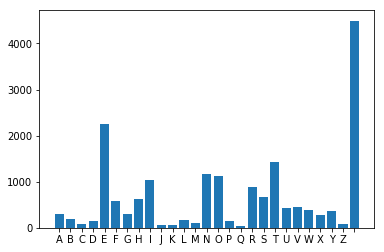

In [31]:
hist_labels = [0]*27
#print(hist_labels)
for s in labels:
    #print(s)
    hist_labels=add_string_to_histogram(hist_labels, ''.join(s))
print(hist_labels)


plot_histogram(hist_labels)

In [32]:
def ler_extended(ref, hyp ,debug=False):
    r = list(ref)
    h = list(hyp)
    #costs will holds the costs, like in the Levenshtein distance algorithm
    costs = [[0 for inner in range(len(h)+1)] for outer in range(len(r)+1)]
    # backtrace will hold the operations we've done.
    # so we could later backtrace, like the WER algorithm requires us to.
    backtrace = [[0 for inner in range(len(h)+1)] for outer in range(len(r)+1)]
 
    OP_OK = 0
    OP_SUB = 1
    OP_INS = 2
    OP_DEL = 3
    
    SUB_PENALTY = 1
    INS_PENALTY = 1
    DEL_PENALTY = 1
     
    # First column represents the case where we achieve zero
    # hypothesis words by deleting all reference words.
    for i in range(1, len(r)+1):
        costs[i][0] = DEL_PENALTY*i
        backtrace[i][0] = OP_DEL
         
    # First row represents the case where we achieve the hypothesis
    # by inserting all hypothesis words into a zero-length reference.
    for j in range(1, len(h) + 1):
        costs[0][j] = INS_PENALTY * j
        backtrace[0][j] = OP_INS
     
    # computation
    for i in range(1, len(r)+1):
        for j in range(1, len(h)+1):
            if r[i-1] == h[j-1]:
                costs[i][j] = costs[i-1][j-1]
                backtrace[i][j] = OP_OK
            else:
                substitutionCost = costs[i-1][j-1] + SUB_PENALTY # penalty is always 1
                insertionCost    = costs[i][j-1] + INS_PENALTY   # penalty is always 1
                deletionCost     = costs[i-1][j] + DEL_PENALTY   # penalty is always 1
                 
                costs[i][j] = min(substitutionCost, insertionCost, deletionCost)
                if costs[i][j] == substitutionCost:
                    backtrace[i][j] = OP_SUB
                elif costs[i][j] == insertionCost:
                    backtrace[i][j] = OP_INS
                else:
                    backtrace[i][j] = OP_DEL
                 
    # back trace though the best route:
    i = len(r)
    j = len(h)
    numSub = 0
    numDel = 0
    numIns = 0
    numCor = 0
    if debug:
        print("OP\tREF\tHYP")
        lines = []
    while i > 0 or j > 0:
        if backtrace[i][j] == OP_OK:
            numCor += 1
            i-=1
            j-=1
            if debug:
                lines.append("OK\t" + r[i]+"\t"+h[j])
        elif backtrace[i][j] == OP_SUB:
            numSub +=1
            i-=1
            j-=1
            if debug:
                lines.append("SUB\t" + r[i]+"\t"+h[j])
        elif backtrace[i][j] == OP_INS:
            numIns += 1
            j-=1
            if debug:
                lines.append("INS\t" + "****" + "\t" + h[j])
        elif backtrace[i][j] == OP_DEL:
            numDel += 1
            i-=1
            if debug:
                lines.append("DEL\t" + r[i]+"\t"+"****")
    if debug:
        lines = reversed(lines)
        for line in lines:
            print(line)
        print("#cor " + str(numCor))
        print("#sub " + str(numSub))
        print("#del " + str(numDel))
        print("#ins " + str(numIns))
    #return (numSub + numDel + numIns) / (float) (len(r))
    if len(r) == 0:
        r = str(1)
    wer_result = round( (numSub + numDel + numIns) / (float) (len(r)), 3)
    
    return {'Total absolute':(numSub + numDel + numIns),'WER':wer_result, 'Correct':numCor, 'Sub':numSub, 'Ins':numIns, 'Del':numDel}

# Step 3

* In here we train the network

Cost:  90.27792358398438
Cost:  91.96423950195313
Number of epochs: 2
2
2
2


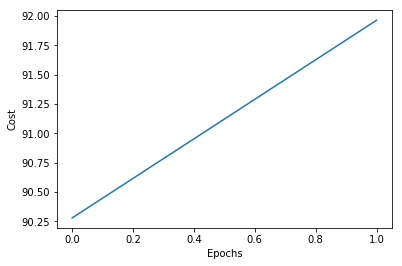

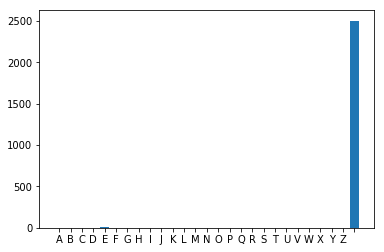

Cost:  88.75633544921875
Cost:  97.073779296875
Number of epochs: 4
4
4
4


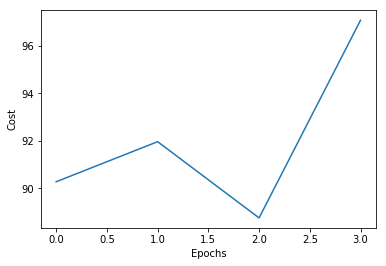

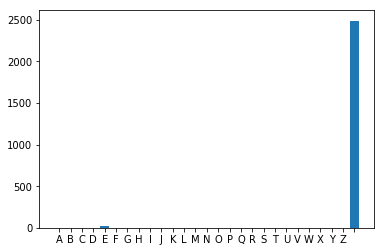

Cost:  90.334912109375


KeyboardInterrupt: 

In [34]:
counter = 0

torch.set_default_tensor_type('torch.FloatTensor')

hist_predicted = []

costs=[]
costs_eval=[]
num_evals=1 # or 0?
epoch=0

comparisons = []

for i in range(28):
    row = []
    for j in range(28):
        row.append(0)
    comparisons.append(row)

while epoch < num_epochs:
    hist_preds = [0]*27
    for i in range(int(num_samples/batch_size)):
        net.train()
        sample = np.empty([batch_size,400, 638])
        
        ground_truth_sizes = torch.empty(batch_size)
        probs_sizes = torch.empty(batch_size)
        
        ground_truth_string_int = []
        avg_cost=0
        for j in range(batch_size):
            samp = np.asarray(raw_wave_training_frames[i * batch_size + j].T, dtype=np.float32)
            sample[j] = samp
            
            string = ''.join(labels[i * batch_size + j])
           
            ground_truth_sizes[j] = len(string)
        
            for character in string:
                ground_truth_string_int.append(char_to_number[character])
        
        input_sample=torch.from_numpy(sample)
        

        ground_truth = torch.IntTensor(ground_truth_string_int)
        out = net(Variable(input_sample).float(), False)
        for j in range(batch_size):
            probs_sizes[j]=out.shape[1]
            
        for j, pred in enumerate(out): 
            if (epoch %100==0 and epoch > 0 and i == 0 and j == 0):
                print(''.join(greedy_decoder(torch.nn.functional.log_softmax(pred, dim=1), all_labels)))
                print_comparisons(matrix=comparisons)
            hist_preds = add_string_to_histogram(hist_preds, greedy_decoder(torch.nn.functional.log_softmax(pred, dim=1), all_labels))
            comparisons = prediction_comparator(comparisons, truth=''.join(labels[i*batch_size + j]),predicted=''.join(greedy_decoder(torch.nn.functional.log_softmax(pred, dim=1), all_labels)))

        #run the criterion
        optimizer.zero_grad()

       
        cost=criterion(out.transpose(0,1), torch.tensor(ground_truth_string_int).int(), probs_sizes.int(), ground_truth_sizes.int())
        cost.backward()
        optimizer.step()
        #print(cost)
        avg_cost = avg_cost+cost.item()/batch_size
        
    #print("average cost", avg_cost)
    avg_cost=avg_cost
    epoch = epoch + 1
    costs.append(avg_cost)
    print('Cost: ', avg_cost)
    
    #plots the average cost
    if(epoch%2 == 0 and epoch > 0):
        print("Number of epochs: "  + str(epoch))
        display_cost(costs, epoch)
        plot_histogram(hist_preds)
    error_rates=[]

    #evaluation not really implemented yet.    
    if(epoch%valid_epochs == 0 and epoch > 0):
        net.eval()
        avg_ler = 0
        avg_wer = 0
        with torch.no_grad():
            indices = [0]*batch_size
            
            for j in range(batch_size):
                indices[j] = random.randint(0, len(raw_valid) - 1)
            print(indices)
            
            ground_truth_string_int = []
            ground_truth_sizes = torch.empty(batch_size)
            probs_sizes = torch.empty(batch_size)
            
            avg_error_rate = 0
            for j in range(batch_size):
                sample = np.empty([batch_size,400, 638])
                sample[j] = raw_valid[j].T
                
                string = ''.join(labels[i * batch_size + j])
                ground_truth_sizes[j] = len(string)
                
                for character in string:
                    ground_truth_string_int.append(char_to_number[character])

                outs, out = net(Variable(torch.from_numpy(sample).float()),True)
                
                for j in range(batch_size):
                    probs_sizes[j]=out.shape[1]
                for k, res in enumerate(outs):
                    print(res.shape)
                    plt.figure(figsize=(10, 4))
                    librosa.display.specshow(res[0].detach().numpy(), x_axis='time', sr=16000)
                    plt.colorbar()
                    plt.title('conv_'+str(k+1))
                    plt.tight_layout()
                
                print(out.shape)
                
                cost=criterion(out.transpose(0,1), torch.tensor(ground_truth_string_int).int(), probs_sizes.int(), ground_truth_sizes.int())
        
                costs_eval.append(cost/batch_size)
                
                for j in range(batch_size):
                    ground_truth = ''.join(labels_valid[j])
                    predicted = ''.join(greedy_decoder(out[j], all_labels))
                    print("Predicted: " + predicted)
                    print("Ground truth: " + ground_truth)
                    ler = ler_extended(predicted, ground_truth)
                    print("ler: ")
                    print(ler)
                    avg_error_rate = avg_error_rate + ler['Total absolute']
            
            print("Eval loss: ")
            display_cost_eval(costs_eval, epoch, valid_epochs)
                
            num_evals += 1
            
            avg_error_rate/batch_size
            error_rates.append(avg_error_rate)
        